## Team Members:

- Anirudh Anil Sharma: D20004
- Shreya Arora: D20032


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3</a></span></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 4</a></span></li><li><span><a href="#Question-6" data-toc-modified-id="Question-6-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Question 6</a></span></li></ul></div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("Set3", 9)
import os

In [ ]:

os.chdir(r'D:\DS Study Material\PY\Term 1')
os.getcwd()

In [ ]:
Netflix = pd.read_csv(r'C:\Users\Chief\Documents\Praxis\PY\Endterm\TV Shows - Netflix.csv')
Audible = pd.read_csv(r'C:\Users\Chief\Documents\Praxis\PY\Endterm\Audible_Catlog.csv')

In [ ]:
Netflix.head()

In [ ]:
Netflix.dtypes

In [ ]:
Audible.head()

In [ ]:
Audible.dtypes

## Question 1

You will create a function named ‘Histogram’ which will take the entire dataset as input and return the histograms for all the numerical variables in your dataset as .png files in your working directory. Make sure that all the generated graphs have proper titles and axis labels.

In [ ]:
def histogram(dataframe):
    inttype = []
    objecttype = []
    for column in dataframe:
        columnObjectSeries = dataframe[column]
        
# Distinguish between Data Types
        if (columnObjectSeries.dtypes == 'int64') or (columnObjectSeries.dtypes == 'float64'):
            inttype.append(column)
        elif columnObjectSeries.dtypes == 'object':
            objecttype.append(column)
    
    numerical = dataframe[inttype] # New dataframe of numerical data
    categorical = dataframe[objecttype] # New dataframe of object type data
    
    for column in numerical:
        plt.hist(numerical[column])
        plt.xlabel(column)
        plt.ylabel('Count of data')
        plt.title(column)
        plt.savefig('{} histogram.png'.format(column))
        plt.show()
    
histogram(Audible) 

## Question 2

Make an improvement on the function you have created in 1. Create a function names ‘Graphs’ which will take a dataset as input and return histograms and boxplots for all the numerical variables and bar plots for all categorical variables

In [ ]:
def graphs(dataframe):
    inttype = []
    objecttype = []
    for column in dataframe:
        columnObjectSeries = dataframe[column]
        if (columnObjectSeries.dtypes == 'int64') or (columnObjectSeries.dtypes == 'float64') :
            inttype.append(column)
        elif columnObjectSeries.dtypes == 'object':
            objecttype.append(column)
    
    numerical = dataframe[inttype] # New dataframe of numerical data
    categorical = dataframe[objecttype] # New dataframe of object type data
    
# Plotting Histogram for Numerical data    
    for column in numerical:
        plt.hist(numerical[column])
        plt.xlabel(column)
        plt.ylabel('Count of data')
        plt.title('{} histogram'.format(column))
        plt.savefig('{} histogram.png'.format(column))
        plt.show()
        
# Plotting box plot for Numerical data
    for column in numerical:
        sns.boxplot(data = numerical[column])
        plt.savefig('{} boxplot.png'.format(column))
        plt.xlabel(column)
        plt.title('{} boxplot.png'.format(column))
        plt.show()
    
# Plotting bar chart for all categorical data
    for column in categorical:
            sns.countplot(data = categorical, x = column, order=pd.value_counts(dataframe[column]).iloc[:10].index)
            plt.xticks(rotation=45)
            plt.xlabel(column)
            plt.title("{} Countplot ".format(column))
            plt.savefig('{} countplot.png'.format(column))
            plt.show()
graphs(Netflix)


## Question 3

Often, we are not required to plot the graphs for all the variables in our dataset. Add an additional argument to the function in 2 named ‘var’. This will take a list containing the variable index and return the graphs for only those variables. By default, (i.e. if the list of variable index is not provided), then it must return the required graphs for all the variables in data. (10 marks) Example: Graphs(data, var=c(1,3,4))

In [ ]:
def graphs(dataframe, var = None):
    inttype = []
    objecttype = []
    for column in dataframe:
        columnObjectSeries = dataframe[column]
        if (columnObjectSeries.dtypes == 'int64') or (columnObjectSeries.dtypes == 'float64') :
            inttype.append(column)
        elif columnObjectSeries.dtypes == 'object':
            objecttype.append(column)
    
    numerical = dataframe[inttype] # New dataframe of numerical data
    categorical = dataframe[objecttype] # New dataframe of object type data
    
    if var is None:
    # Plotting Histogram for Numerical data    
        for column in numerical:
            plt.hist(numerical[column])
            plt.xlabel(column)
            plt.ylabel('Count of data')
            plt.title('{} histogram'.format(column))
            plt.savefig('{} histogram.png'.format(column), bbox_inches = "tight", dpi= 300)
            plt.show()

    # Plotting box plot for Numerical data
        for column in numerical:
            sns.boxplot(data = numerical[column])
            plt.xlabel(column)
            plt.title('{} boxplot'.format(column))
            plt.savefig('{} boxplot.png'.format(column), bbox_inches = "tight", dpi= 300)            
            plt.show()

    # Plotting bar chart for all categorical data
        for column in categorical:
                sns.countplot(data = categorical, x = column, order=pd.value_counts(dataframe[column]).iloc[:10].index)
                plt.xticks(rotation=45)
                plt.xlabel(column)
                plt.title('{} countplot'.format(column))
                plt.savefig('{} countplot.png'.format(column), bbox_inches = "tight", dpi= 300)
                plt.show()
                
    else:
        columns = []
        columns = dataframe.columns # Orginal Columns list            
                    
        for x in var:
            column = columns[x] # The name of the required columns

            if column in numerical:
                
                plt.hist(numerical[column])
                plt.xlabel(column)
                plt.ylabel('Count of data')
                plt.title('{} histogram'.format(column))
                plt.savefig('{} histogram.png'.format(column), bbox_inches = "tight", dpi= 300)
                plt.show()

        # Plotting box plot for Numerical data
            if column in numerical:
                sns.boxplot(data = numerical[column])                
                plt.xlabel(column)
                plt.title('{} boxplot'.format(column))
                plt.savefig('{} boxplot.png'.format(column), bbox_inches = "tight", dpi= 300)
                plt.show()

        # Plotting bar chart for all categorical data
            if column in categorical:
                    sns.countplot(data = categorical, x = column, order=pd.value_counts(dataframe[column]).iloc[:10].index)
                    plt.xticks(rotation=45)
                    plt.title('{} countplot'.format(column))
                    plt.xlabel(column)
                    plt.savefig('{} countplot.png'.format(column), bbox_inches = "tight", dpi= 300)
                    plt.show()



In [ ]:
Netflix.columns

In [ ]:
graphs(Netflix, [1,2,3])

In [ ]:
Audible.columns

In [ ]:
graphs(Audible)

## Question 4

Sometimes, we do not want to mess up our working directories with so many image files. Create an additional argument for the function "dir" (directory), such that the function exports all the files to that specified folder (which need not necessarily be your working directory)

In [61]:
def graphs(dataframe, var = None, directory = os.getcwd()):
    inttype = []
    objecttype = []
    for column in dataframe:
        columnObjectSeries = dataframe[column]
        if (columnObjectSeries.dtypes == 'int64') or (columnObjectSeries.dtypes == 'float64') :
            inttype.append(column)
        elif columnObjectSeries.dtypes == 'object':
            objecttype.append(column)
    
    numerical = dataframe[inttype] # New dataframe of numerical data
    categorical = dataframe[objecttype] # New dataframe of object type data
    
    if var is None:
    # Plotting Histogram for Numerical data    
        for column in numerical:
            plt.hist(numerical[column])
            plt.xlabel(column)
            plt.ylabel('Count of data')
            plt.title('{} histogram'.format(column))
            plt.savefig('{}/{} histogram.png'.format(directory,column), bbox_inches = "tight", dpi= 300)
            plt.show()

    # Plotting box plot for Numerical data
        for column in numerical:
            sns.boxplot(data = numerical[column])
            plt.title('{} boxplot'.format(column))
            plt.xlabel(column)
            plt.savefig('{}/{} boxplot.png'.format(directory,column), bbox_inches = "tight", dpi= 300)
            plt.show()

    # Plotting bar chart for all categorical data
        for column in categorical:
                sns.countplot(data = categorical, x = column, order=pd.value_counts(dataframe[column]).iloc[:10].index)
                plt.xticks(rotation=45)
                plt.title('{} countplot'.format(column))
                plt.xlabel(column)
                plt.savefig('{}/{} countplot.png'.format(directory,column), bbox_inches = "tight", dpi= 300)
                plt.show()
                
    else:
        columns = []
        columns = dataframe.columns            
                    
        for x in var:
            column = columns[x] # The name of the column

            if column in numerical:
                plt.hist(numerical[column])
                plt.xlabel(column)
                plt.ylabel('Count of data')
                plt.title('{} histogram'.format(column))
                plt.savefig('{}/{} histogram.png'.format(directory,column), bbox_inches = "tight", dpi= 300)
                plt.show()

        # Plotting box plot for Numerical data
            if column in numerical:
                sns.boxplot(data = numerical[column])
                plt.title(plt.savefig('{} boxplot'.format(column)))
                plt.xlabel(column)
                plt.savefig('{}/{} boxplot.png'.format(directory,column), bbox_inches = "tight", dpi= 300)
                plt.show()

        # Plotting bar chart for all categorical data
            if column in categorical:
                    sns.countplot(data = categorical, x = column, order=pd.value_counts(dataframe[column]).iloc[:10].index)
                    plt.xticks(rotation=45)
                    plt.title('{} countplot'.format(column))
                    plt.xlabel(column)
                    plt.savefig('{}/{} countplot.png'.format(directory,column), bbox_inches = "tight", dpi= 300)
                    plt.show()



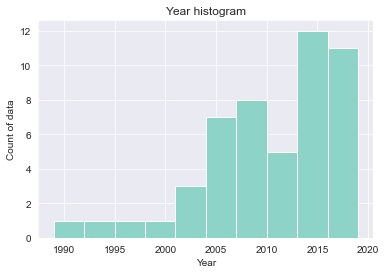

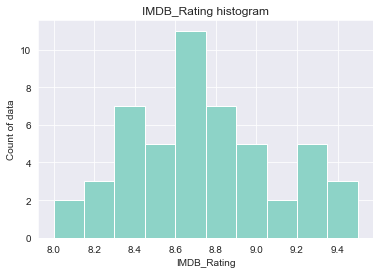

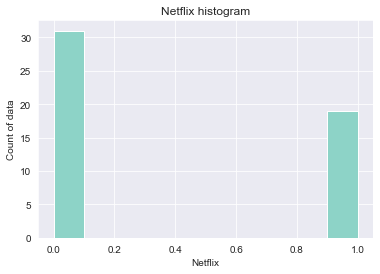

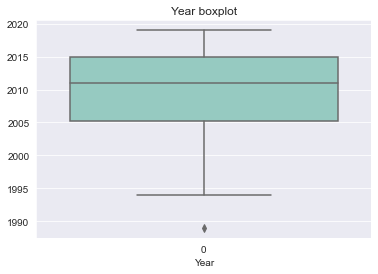

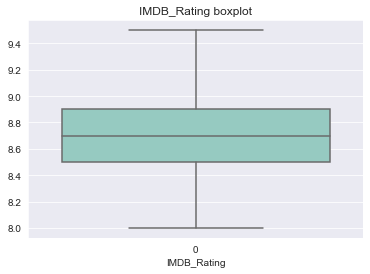

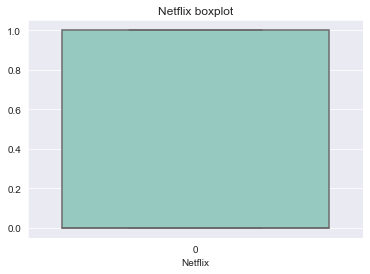

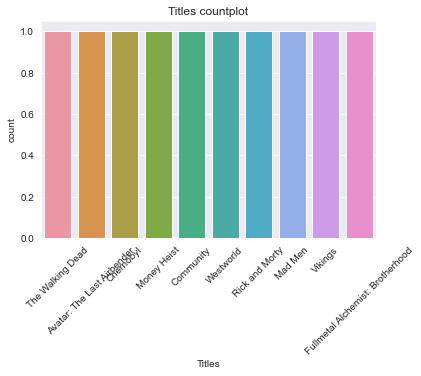

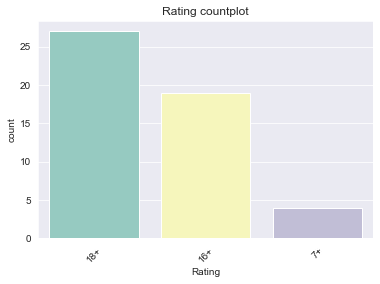

In [62]:
graphs(Netflix,directory = 'C:/Users/Chief/Documents/Praxis/PY/Graphs')

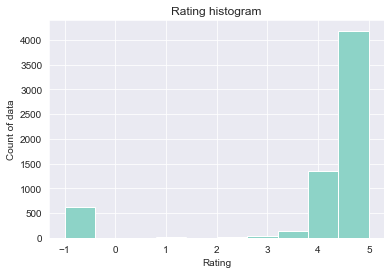

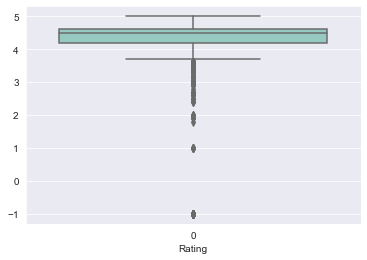

C:\Users\Chief\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Chief\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


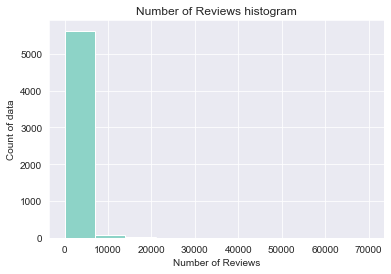

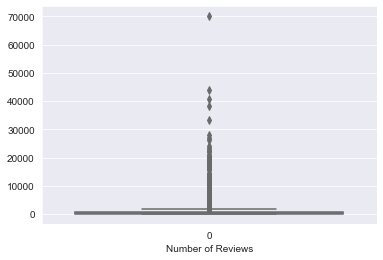

C:\Users\Chief\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Chief\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


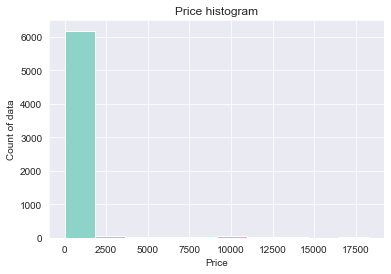

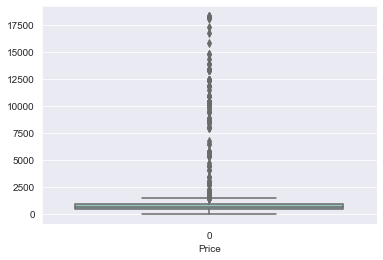

In [63]:
graphs(Audible, [2,3,4])

## Question 6

New Improvements: Design a new function which you feel can help you a lot in your EDA process.

In [72]:
def data_dict(dataframe):
    import numpy as np
    
    print('Data frame shape is: ', dataframe.shape)
    for column in dataframe:
        unique_values = np.unique(dataframe[column])
        unique_no = len(unique_values)
        if unique_no < 10:
            print("The number of unique values for feature {} is {} -- {}".format(column,unique_no, unique_values ))
        else:
            print("The number of unique values for feature {} is {} ".format(column,unique_no ))
    
    # Check for null Values
    plt.figure(figsize = (12,5))
    sns.heatmap(dataframe.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
    plt.title("Check for Null Values")
    
    # Show Correlation
    plt.figure(figsize=(12,8))
    sns.heatmap(dataframe.corr(),annot=True, cbar = False)
    plt.show()


Data frame shape is:  (6368, 5)
The number of unique values for feature Book Name is 5396 
The number of unique values for feature Author is 3538 
The number of unique values for feature Rating is 32 
The number of unique values for feature Number of Reviews is 2375 
The number of unique values for feature Price is 394 


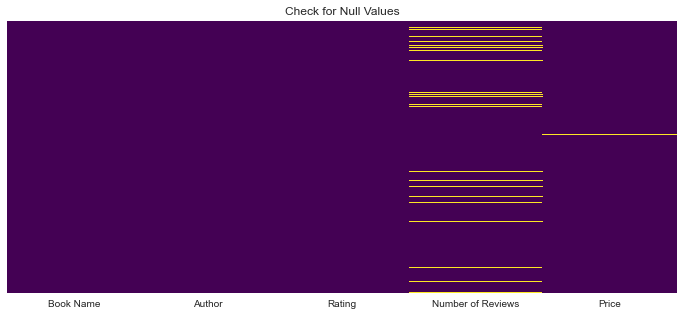

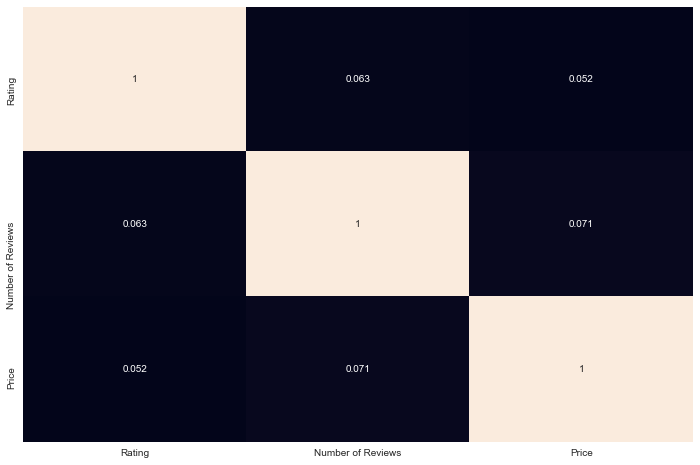

In [73]:
data_dict(Audible)

Data frame shape is:  (50, 5)
The number of unique values for feature Titles is 50 
The number of unique values for feature Year is 20 
The number of unique values for feature Rating is 3 -- ['16+' '18+' '7+']
The number of unique values for feature IMDB_Rating is 16 
The number of unique values for feature Netflix is 2 -- [0 1]


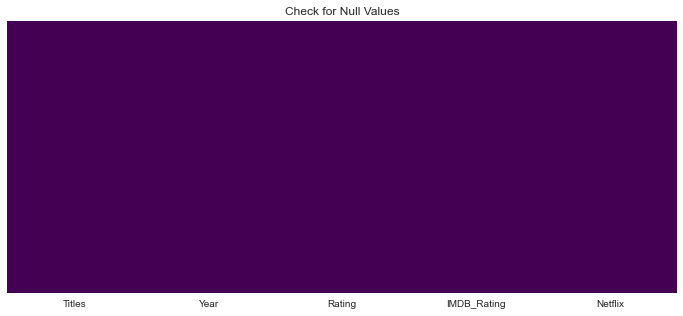

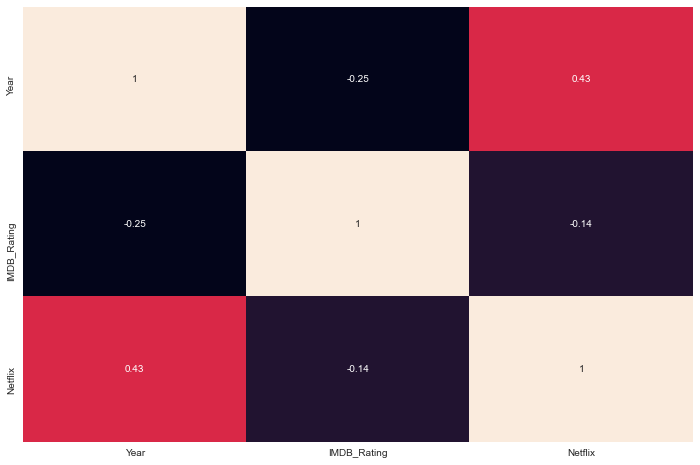

In [74]:
data_dict(Netflix)